# Análisis Pretest y Postest - Agencia Banco de la república

## Paso 1: Incorporar Librerías

In [72]:
###Librerías
import pandas as pd
import numpy as np
##Librerías para graficar
import matplotlib.pyplot as plt
import seaborn as sns
##Librerías para test de normalidad
import statsmodels.api as sm
from scipy import stats
##Librerias para preprocesamiento
from sklearn.preprocessing import MinMaxScaler, StandardScaler
##Librerías para over y under sampling
from sklearn.utils import resample
##Warnings
import warnings
warnings.filterwarnings('ignore')

## Paso 2: Funciones para el Manejo de procesos

In [94]:
# Función para importar data .xlsx o .csv
def importDatos(ruta, archivo, ext, sp):
    if ext == '.csv':
        data = pd.read_csv(ruta+archivo+ext, encoding='windows-1252', sep=sp)
        return data
    elif ext == '.xlsx':
        data = pd.read_excel(ruta+archivo+ext)
        return data
    else:
        print('Extensión diferente')

# Función informe sobre los datos NAN
def datos_NA(df):
    if isinstance(df, pd.DataFrame):
        total_na = df.isna().sum().sum()
        print("Dimensiones : %d filas, %d columnas" %
              (df.shape[0], df.shape[1]))
        print("Total Valores NA : %d " % (total_na))
        print("%38s %10s     %10s %10s" %
              ("Nombre Columna", "Tipo de Dato", "#Distintos", "Valores NA"))
        col_name = df.columns
        dtyp = df.dtypes
        uniq = df.nunique()
        na_val = df.isna().sum()
        for i in range(len(df.columns)):
            print("%38s %10s   %10s %10s" %
                  (col_name[i], dtyp[i], uniq[i], na_val[i]))

    else:
        print("Se esperaba dataframe %15s" % (type(df)))

# Funcion para revisar datos categóricos o texto
def revCategoricos(df, nomCol):
    rev = df[nomCol].value_counts()
    return rev

# Función modificar a 1 y 0 los datos categóricos

def camTextBi(df, nomCol, busqueda, camuno, camdos):
    df[nomCol] = np.where(df[nomCol] == busqueda, camuno, camdos)
    return df[nomCol]

# Función para variables dummies

def convDummies(df, nomCol):
    dummies = pd.get_dummies(df[nomCol])
    data = pd.concat([df, dummies], axis=1)
    data.drop(columns=[nomCol], inplace=True)
    return data

#Función para grágicas 
def histoPlot(df, nomCol, anchoBar):
    plt.figure(figsize=(10, 8))
    sns.histplot(data=df, x=nomCol, binwidth=anchoBar, kde=True)

#Función para digrama de caja 
def boxPlot(df, varx, vary, varhue):
    sns.set_context("notebook", font_scale=1.5)
    plt.figure(figsize=(10,8))
    grped_bplot = sns.catplot(x=varx, y=vary,
                 hue=varhue,
                data=df, kind="box",
            legend=True,
            height=6, aspect=1.3)
    

#Función de barras
def barPlot(varx, vary, varhue, df, ejey, ejex):
    plt.figure(figsize=(10, 8))
    ax= sns.barplot(x=varx, y=vary, hue=varhue, data=df)
    plt.ylabel(ejey, size=14)
    plt.xlabel(ejex, size=14)
    sns.move_legend(
    ax, "lower center",
    bbox_to_anchor=(.5, 1), ncol=3, title=None, frameon=False,
    )

##Función multigráfica
colors = ['#2ECC71','#3498DB', '#9B59B6','#E67E22', '#F1C40F']

def drawChart(column1, column2, texto1, texto2, explod, sizes):
    f, ax = plt.subplots(1,2, figsize=(sizes[0],sizes[1]))
    ##Grafica Matplotlib
    diagI[column2].value_counts().plot.pie( autopct='%1.1f%%', ax=ax[0], 
                                             shadow=True, 
                                             explode= explod, fontsize=12, 
                                             colors=colors)
    ax[0].set_title(texto1, fontsize=14)
    ax[0].set_xlabel('', fontsize=12)
    ax[0].set_ylabel('', fontsize=12)
    ax[0].legend(['Estrato 2','Estrato 3','Estrato 1'], loc=2, fontsize=8)
    #ax[0].legend(['4 Siempre', '3 Casi siempre', '2 Algunas Veces','1 Casi Nunca', '0 Nunca'],loc=2, fontsize=10)
    
    
    ##Grafica seaborn '#fb8c00','#0288d1','#00e676','#ff5722','#ffeb3b','#e040fb'
    plot = sns.countplot(column1, hue=column2, data=diagI, ax=ax[1], palette=colors)
    for i in plot.patches:
        plot.annotate(i.get_height(),
                      (i.get_x() + i.get_width()/2, i.get_height()),
                      ha='center', va='baseline', fontsize=12, 
                     color='black', xytext=(0,1),
                     textcoords='offset points')
    ax[1].set_title(texto2,fontsize=14)
    ax[1].set_xlabel('', fontsize=12)
    ax[1].set_ylabel('', fontsize=12)
    ax[1].tick_params(labelsize=14)
    plt.legend(labels = ['Estrato 1','Estrato 2','Estrato 3'], fontsize=8)
    
    #plt.legend(labels = ['0 Nunca', '1 Casi Nunca','2 Algunas Veces', '3 Casi siempre','4 Siempre'], fontsize=10)
    plt.show() 


## Paso 3: Llamado de Funciones

In [64]:
##Importar la data
diagI = importDatos('C:/Users/INPROTI/Downloads/ProyectoPoblacion/','diagnostico_inicial','.csv',';')
diagI.head()

,edad,genero,estrato,nestudio,marcacel,gamacel,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,Notafinal
0,74,Masculino,1,Universitario,Huawei,Gama alta,0,1,1,0,0,0,0,1,0,0,3
1,63,Masculino,2,Posgrado,Xiaomi,Gama media,0,1,0,1,0,0,0,1,0,0,3
2,64,Femenino,3,Posgrado,Huawei,Gama media,0,0,1,0,1,0,0,1,0,0,3
3,67,Masculino,3,Universitario,Sansung,No identifico la gama de mi celular,0,0,0,0,1,0,0,1,0,0,2
4,79,Masculino,3,Secundaria (6 - 9 grado),Samsung,Gama media,0,0,0,1,0,0,0,0,0,0,1


In [14]:
##datos NAN
##La data se encuentra con 13 filas por 17 columnas en total 221 datos. De los cuales 13 variables con numericas tipo int64 y 4 de tipo Object.
datos_NA(diagI)

Dimensiones : 13 filas, 17 columnas
Total Valores NA : 0 
                        Nombre Columna Tipo de Dato     #Distintos Valores NA
                                  edad      int64           12          0
                                genero     object            2          0
                               estrato      int64            3          0
                              nestudio     object            5          0
                              marcacel     object            6          0
                               gamacel     object            4          0
                                    P1      int64            1          0
                                    P2      int64            2          0
                                    P3      int64            2          0
                                    P4      int64            2          0
                                    P5      int64            2          0
                                    P6      int64 

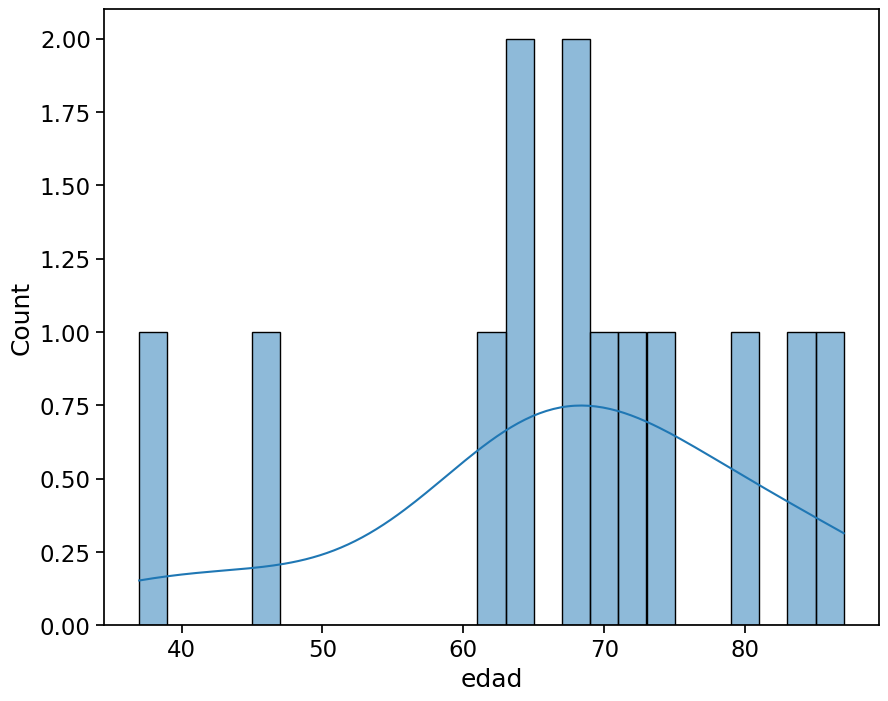

In [43]:
## Revisión de distribuciones.
#La gran mayoría de los adultos mayores se encuentran entre los 60 a 80 años
histoPlot(diagI, 'edad', 2)

<Figure size 1000x800 with 0 Axes>

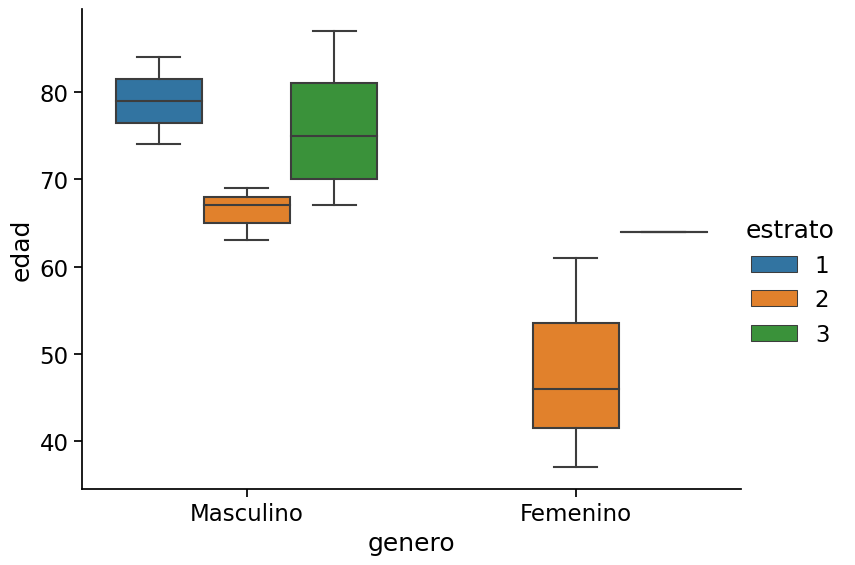

In [50]:
##Las personas con mayor distribución en la data se encuentran en el género másculino con el estrato 1,2 y 3 mientas solo en la población femenina las
#adultas mayores son del estrato 2 en su mayoria. Las medias de edades de la población femenina y masculina son diferentes.
boxPlot(diagI, 'genero', 'edad','estrato')


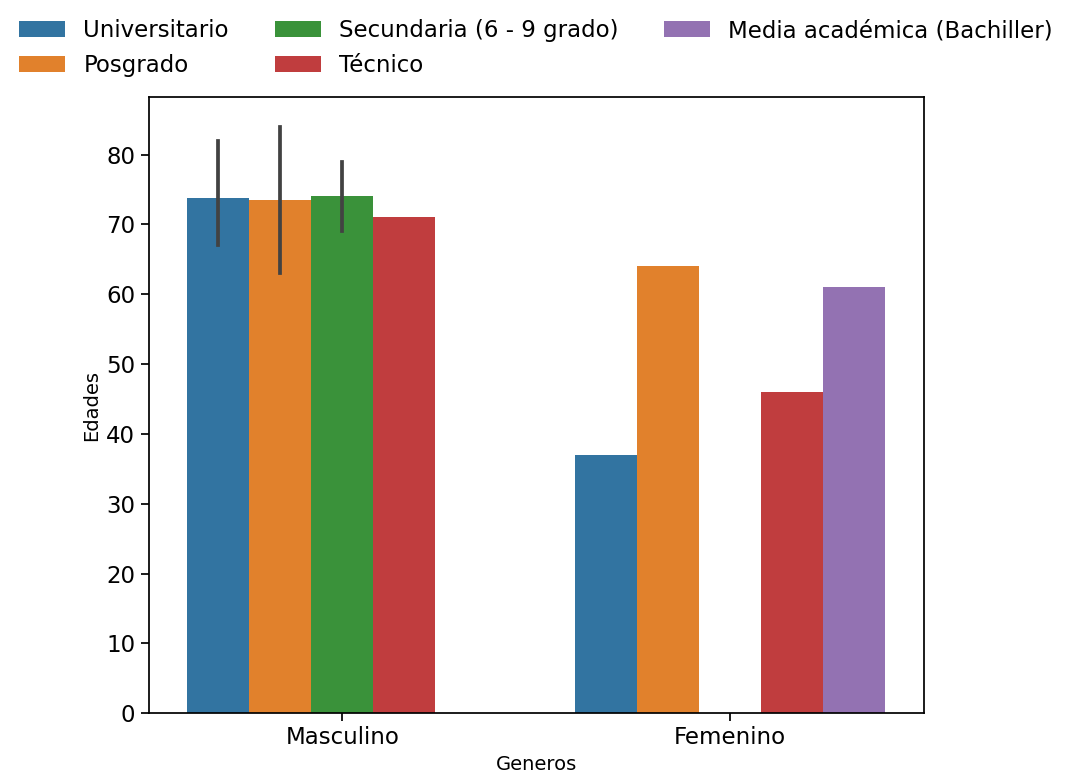

In [57]:
barPlot('genero','edad', 'nestudio',diagI, 'Edades', 'Generos')

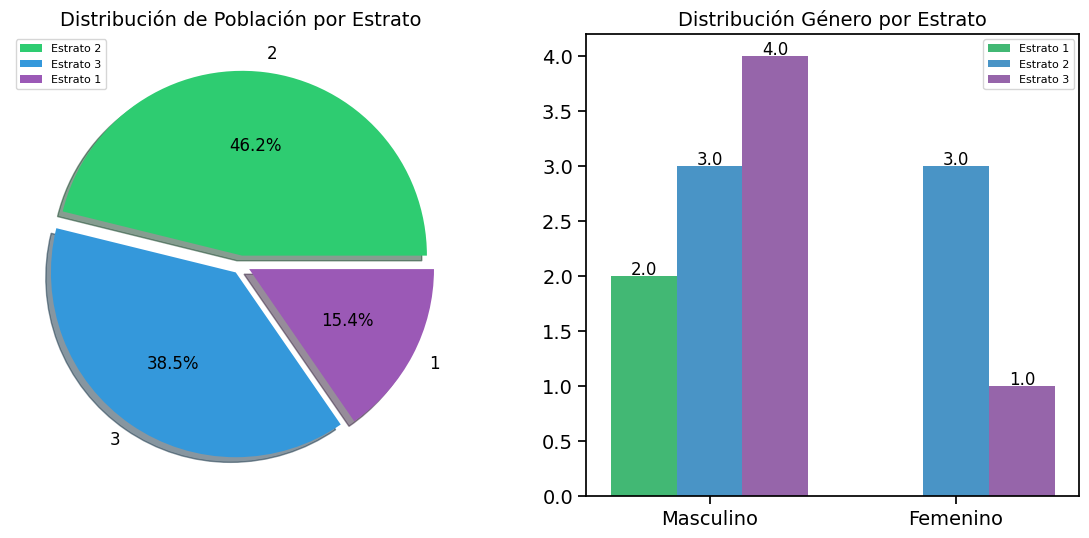

In [97]:
###Drawchart pregunta y genero

drawChart('genero','estrato','Distribución de Población por Estrato','Distribución Género por Estrato',(0.05, 0.05, 0.05), sizes=[14,6])